In [192]:
pip install pandas


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [193]:
import pandas as pd
import json

Converting the Data from the JSON Files into a Dataframe

In [194]:
# to flatten all nested levels, takes in data and outputs to flattened_data list
def flatten(data, flattened_data):
    if isinstance(data, dict):
        for key, value in data.items():
            flatten( (key, value), flattened_data)
    # value is a nested dictionary
    elif isinstance(data[1], dict):
        for key, value in data[1].items():
            flatten( (key, value), flattened_data)
    # value is a nested list
    elif isinstance(data[1], list):
        for item in data[1]:
            flatten(item, flattened_data)
    # flattened key and value
    else:
        length = len(flattened_data)
        key = data[0]
        value = data[1]
        if len(flattened_data[length - 1]) == 0:
            flattened_data[length - 1] = dict()
        flattened_data[length - 1][key] = value

In [195]:
# processes all json files into a dataframe

import os
directory_path = 'data'
combined_df = pd.DataFrame()
files = os.listdir(directory_path)

for file_name in files:
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, 'r') as file:
        file_data = json.load(file)
        file_data_flattened = []

        for item in file_data:
            file_data_flattened.append([])
            flatten(data = item, flattened_data = file_data_flattened)

        file_df = pd.DataFrame(file_data_flattened) 

        if file_name.startswith('clean'):
            file_df['interference'] = [False] * len(file_df)
        else:
            file_df['interference'] = [True] * len(file_df)
        
        if combined_df.shape[0] == 0:
            combined_df = file_df
        else:
            combined_df = pd.merge(combined_df, file_df, how = 'outer')

In [196]:
# display combined_df

display(combined_df.shape)
display(combined_df.head(30))

(11935, 36)

,type,timestamp,carrier_id,cell_id,event_name,pci,cell_identity,sib9_home_enb_name,nof_rach,rnti,...,enb_ue_s1ap_id,bearer_id,qci,dl_total_bytes,ul_total_bytes,dl_latency,ul_latency,dl_buffered_bytes,ul_buffered_bytes,interference
0,event,1.698340e+09,0,1.0,sector_start,1.0,1,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
6,event,1.698340e+09,0,1.0,s1_context_create,NaN,NaN,NaN,NaN,73.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
7,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
8,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
9,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


Data Preperation: Removing Features with No Predictive Value and Handling NaN Values

In [197]:
# data handling
import numpy as np

# making 'cell_identity' numerical

combined_df['cell_identity'] = pd.to_numeric(combined_df['cell_identity'], errors='coerce')

# finds numerical columns with missing values
nan_count = np.sum(combined_df.isnull(), axis = 0)
nan_detected = nan_count > 0
is_int_or_float = (combined_df.dtypes == 'int64') | (combined_df.dtypes == 'float64')

display(nan_detected[nan_detected & is_int_or_float])

to_impute = combined_df[nan_detected[nan_detected & is_int_or_float].index]

# replaces missing numerical values with mean
for col in to_impute:
    mean = combined_df[col].mean()
    combined_df[col].fillna(value = mean, inplace = True)

cell_id              True
pci                  True
cell_identity        True
nof_rach             True
rnti                 True
asn1_length          True
asn1_type            True
additional           True
ue_rnti              True
dl_cqi               True
dl_mcs               True
dl_bitrate           True
dl_bler              True
ul_snr               True
ul_mcs               True
ul_bitrate           True
ul_bler              True
ul_phr               True
ul_bsr               True
mme_ue_s1ap_id       True
enb_ue_s1ap_id       True
bearer_id            True
qci                  True
dl_total_bytes       True
ul_total_bytes       True
dl_latency           True
ul_latency           True
dl_buffered_bytes    True
ul_buffered_bytes    True
dtype: bool

/var/folders/gz/0y3t0pnn71s33kttb2xffn940000gn/T/ipykernel_20844/213964939.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[col].fillna(value = mean, inplace = True)


In [198]:
# columns with missing non-numerical values

nan_count = np.sum(combined_df.isnull(), axis = 0)
display(nan_count[nan_count > 0])

event_name            10700
sib9_home_enb_name    11915
asn1_message          10768
dtype: int64

In [199]:
# dropping non-numerical columns with no predictive value
combined_df.drop(columns = ['asn1_message', 'sib9_home_enb_name'], inplace = True)

# filling NaN values of event_name
combined_df['event_name'].fillna(value = 'no_event', inplace = True)

/var/folders/gz/0y3t0pnn71s33kttb2xffn940000gn/T/ipykernel_20844/2507852044.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['event_name'].fillna(value = 'no_event', inplace = True)


In [200]:
# confirming there are no more missing values
nan_count = np.sum(combined_df.isnull(), axis = 0)
display(nan_count[nan_count > 0])

Series([], dtype: int64)

In [201]:
# one-hot encoding on non-numerical columns
 
cols_with_strings = []
for col in combined_df.columns:
    if combined_df[col].dtype == 'object':
        cols_with_strings.append(col)
        print(col, combined_df[col].nunique())

for col in cols_with_strings:
    df_column = pd.get_dummies(combined_df[col])
    combined_df = pd.concat([combined_df, df_column], axis = 1)
    combined_df.drop(col, axis = 1, inplace = True)

type 3
event_name 8


Running K-Means Clustering Model

In [202]:
!pip install scikit-learn
# new python virtual environment may need to be created to
# install scikit-learn, then change the kernel


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [203]:
# scaling is needed because K-means calculates Euclidean distance to determine the similarity
# between data points and if features have different scales, feature with larger scale will
# dominate

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)
scaled_df = pd.DataFrame(scaled_data, columns = combined_df.columns, index = combined_df.index)
scaled_df

,timestamp,carrier_id,cell_id,pci,cell_identity,nof_rach,rnti,asn1_length,asn1_type,additional,...,metrics,ul_rlf,no_event,rlf_detected,rlf_report,rrc_log,s1_context_create,s1_context_delete,sector_start,sector_stop
0,-1.619888,0.0,0.0,0.0,0.0,0.000000,2.688216e-15,-9.199933e-16,0.000000,1.130953e-16,...,-2.943462,-0.015856,-2.943462,-0.015856,-0.124093,-0.300090,-0.047617,-0.038864,34.532593,-0.028958
1,-1.618515,0.0,0.0,0.0,0.0,0.000000,-4.483009e+00,-2.476477e+00,-8.851443,-3.306035e-01,...,-2.943462,-0.015856,-2.943462,-0.015856,-0.124093,3.332336,-0.047617,-0.038864,-0.028958,-0.028958
2,-1.618513,0.0,0.0,0.0,0.0,0.000000,-4.483009e+00,3.159843e+00,-6.954156,-3.306035e-01,...,-2.943462,-0.015856,-2.943462,-0.015856,-0.124093,3.332336,-0.047617,-0.038864,-0.028958,-0.028958
3,-1.618465,0.0,0.0,0.0,0.0,0.000000,-4.483009e+00,-2.448153e+00,-5.056868,-3.306035e-01,...,-2.943462,-0.015856,-2.943462,-0.015856,-0.124093,3.332336,-0.047617,-0.038864,-0.028958,-0.028958
4,-1.618296,0.0,0.0,0.0,0.0,0.000000,-4.483009e+00,6.210658e+00,-3.159580,-3.306035e-01,...,-2.943462,-0.015856,-2.943462,-0.015856,-0.124093,3.332336,-0.047617,-0.038864,-0.028958,-0.028958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,1.577064,0.0,0.0,0.0,0.0,2.482146,2.688216e-15,-9.199933e-16,0.000000,1.130953e-16,...,0.339736,-0.015856,0.339736,-0.015856,-0.124093,-0.300090,-0.047617,-0.038864,-0.028958,-0.028958
11931,1.577204,0.0,0.0,0.0,0.0,2.482146,2.688216e-15,-9.199933e-16,0.000000,1.130953e-16,...,0.339736,-0.015856,0.339736,-0.015856,-0.124093,-0.300090,-0.047617,-0.038864,-0.028958,-0.028958
11932,-1.274284,0.0,0.0,0.0,0.0,0.000000,3.083645e+00,-9.199933e-16,0.000000,1.130953e-16,...,-2.943462,63.066103,-2.943462,63.066103,-0.124093,-0.300090,-0.047617,-0.038864,-0.028958,-0.028958
11933,-1.029605,0.0,0.0,0.0,0.0,0.000000,1.097398e+00,-9.199933e-16,0.000000,1.130953e-16,...,-2.943462,63.066103,-2.943462,63.066103,-0.124093,-0.300090,-0.047617,-0.038864,-0.028958,-0.028958


In [204]:
# create data frame of feature importances obtained from dtmodel.ipynb

data = {
    'Feature': [
        'ue_rnti', 'timestamp', 'nof_rach', 'rnti', 'event',
        'sector_start', 'sector_stop', 'asn1_type', 'dl_total_bytes',
        'ul_total_bytes', 'dl_latency', 'ul_latency', 'dl_buffered_bytes',
        'ul_buffered_bytes', 'pci', 'metrics', 'asn1_length', 'no_event',
        'rlf_detected', 'rlf_report', 'rrc_log', 's1_context_create',
        's1_context_delete', 'cell_id', 'ul_rlf', 'qci', 'bearer_id',
        'enb_ue_s1ap_id', 'carrier_id', 'ul_bsr', 'ul_phr', 'ul_bler',
        'ul_bitrate', 'ul_mcs', 'ul_snr', 'dl_bler', 'dl_bitrate', 'dl_mcs',
        'dl_cqi', 'cell_identity', 'additional', 'mme_ue_s1ap_id'
    ],
    'Importance': [
        0.776041, 0.164420, 0.024762, 0.024163, 0.004213,
        0.002795, 0.002403, 0.001202, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000
    ]
}

# Create a DataFrame
df_importance = pd.DataFrame(data)
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(df_importance_sorted)

              Feature  Importance
0             ue_rnti    0.776041
1           timestamp    0.164420
2            nof_rach    0.024762
3                rnti    0.024163
4               event    0.004213
5        sector_start    0.002795
6         sector_stop    0.002403
7           asn1_type    0.001202
33             ul_mcs    0.000000
27     enb_ue_s1ap_id    0.000000
28         carrier_id    0.000000
29             ul_bsr    0.000000
30             ul_phr    0.000000
31            ul_bler    0.000000
32         ul_bitrate    0.000000
36         dl_bitrate    0.000000
34             ul_snr    0.000000
35            dl_bler    0.000000
25                qci    0.000000
37             dl_mcs    0.000000
38             dl_cqi    0.000000
39      cell_identity    0.000000
40         additional    0.000000
26          bearer_id    0.000000
21  s1_context_create    0.000000
24             ul_rlf    0.000000
14                pci    0.000000
8      dl_total_bytes    0.000000
9      ul_tota

In [205]:
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn.cluster import KMeans


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [214]:
# function to test clustering algorithm with different number of most important features (ex. testing on all features, testing on the 20 most imortant features, testing on the 10 most important features)
# displays centroid plot and accuracy scores

def cluster(n):
    top_features = df_importance_sorted.head(n)['Feature'].tolist()
    top_features.append('interference')

    final_df = scaled_df[top_features]
    kcluster_model = KMeans(n_clusters = 2)
    
    # temporarily drop the label column--that's what we're trying to predict
    kcluster_model.fit(final_df.drop(columns = 'interference'))

    # since the labels (0, 1) contain no information about the interference (T/F) they correspond to, it is useful to combine the cluster labels with the df they originated from

    features = list((final_df.drop(columns = 'interference').columns))
    klabels = kcluster_model.labels_

    plt.figure()
    for i in range(2):
        plt.plot(kcluster_model.cluster_centers_[i], label = 'cluster ' + str(i+1))
    
    plt.xticks(range(len(features)), features, fontsize = 10, rotation = 90)
    plt.ylabel('Units')
    plt.xlabel('Features')
    if n == 40:
        plt.title('Centorid Diagram Using All Features')
    else:
        plt.title('Centroid Diagram Using the Top ' + str(n) + ' Most Important Features')
    plt.legend()
    print(plt)

    homogenity = metrics.homogeneity_score(final_df['interference'], klabels)
    completeness = metrics.completeness_score(final_df['interference'], klabels)
    # return a tuple of data
    return homogenity, completeness

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.

/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

<module 'matplotlib.pyplot' from '/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>


/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/var/folders/gz/0y3t0pnn71s33kttb2xffn940000gn/T/ipykernel_20844/1853398815.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


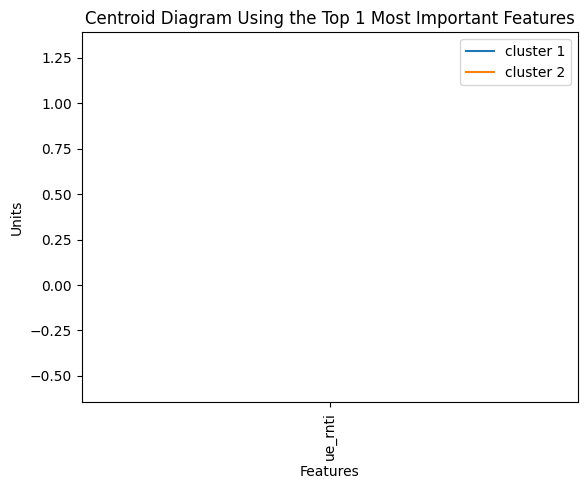

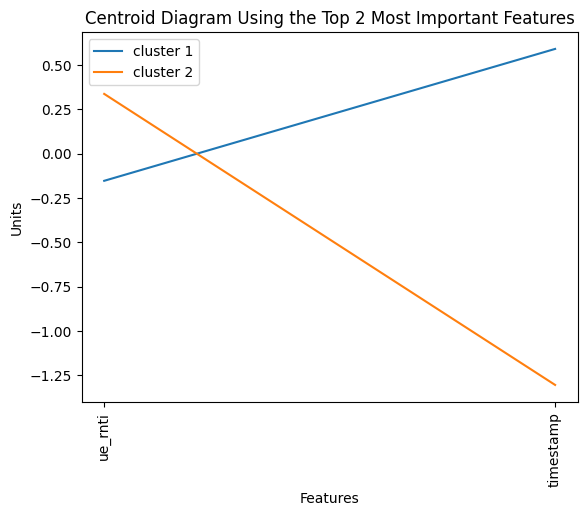

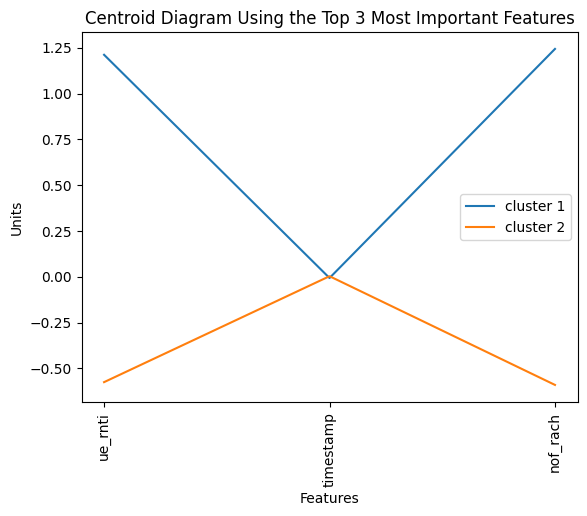

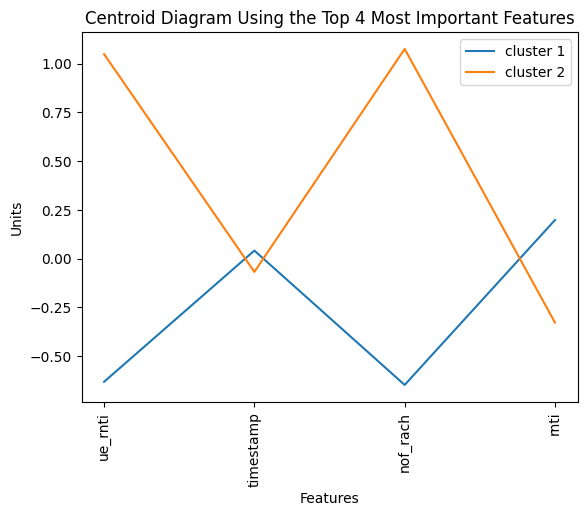

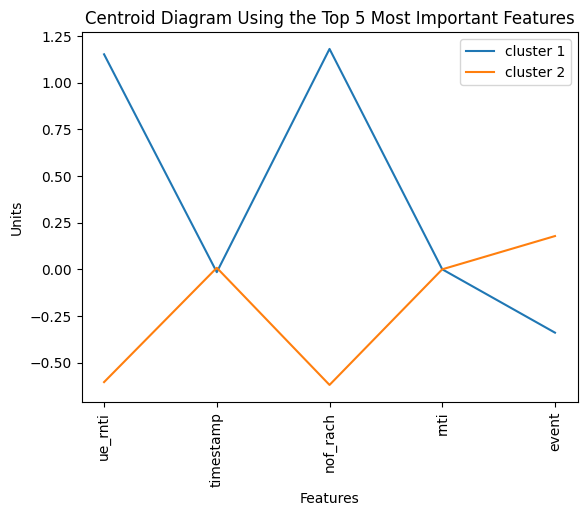

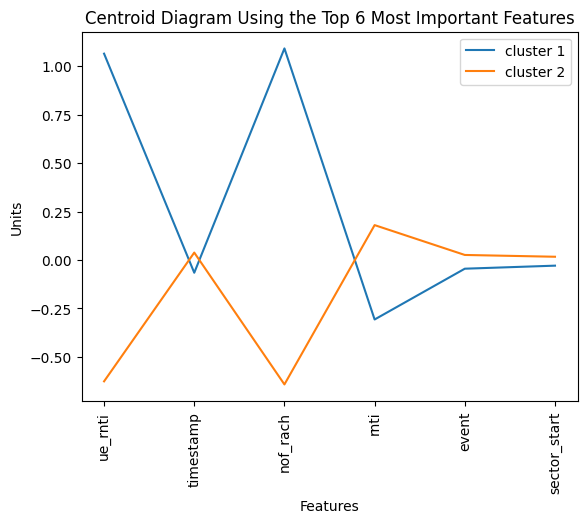

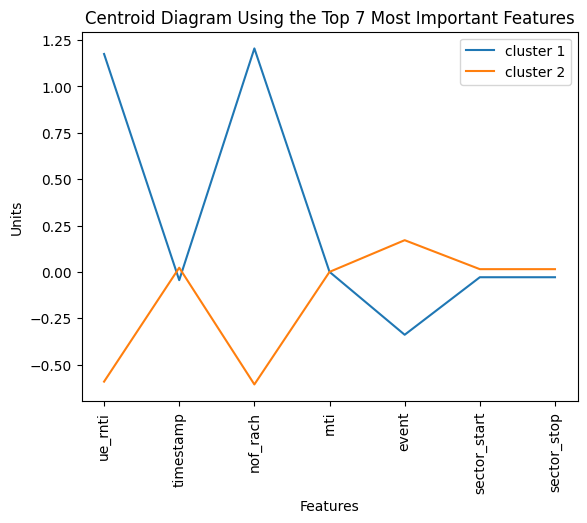

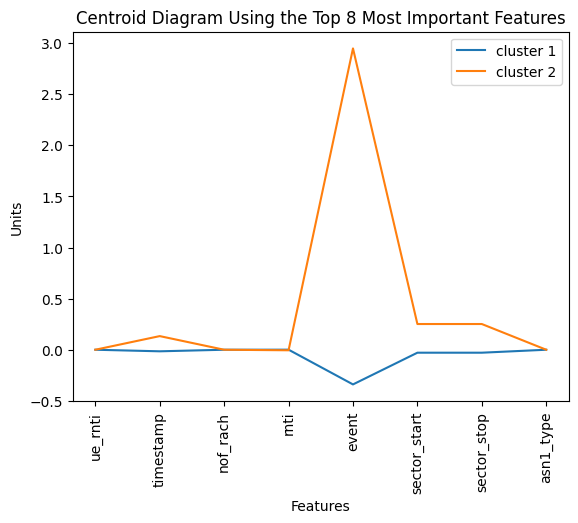

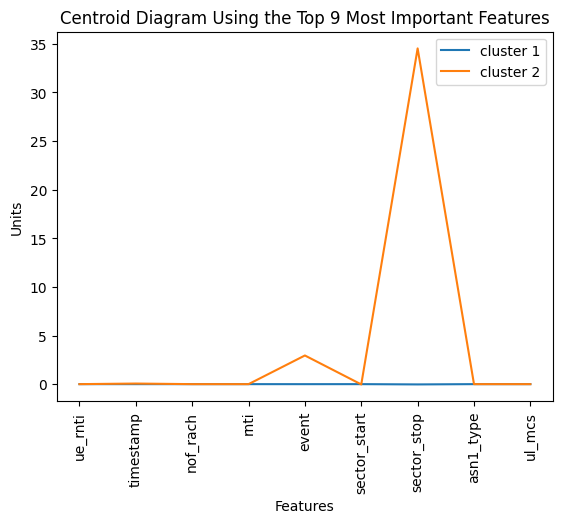

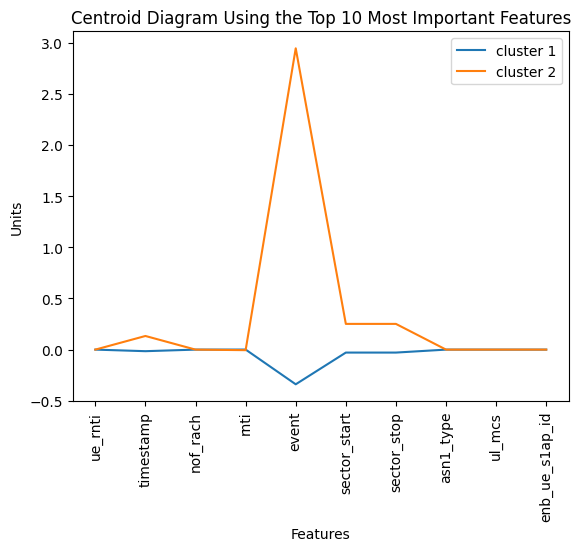

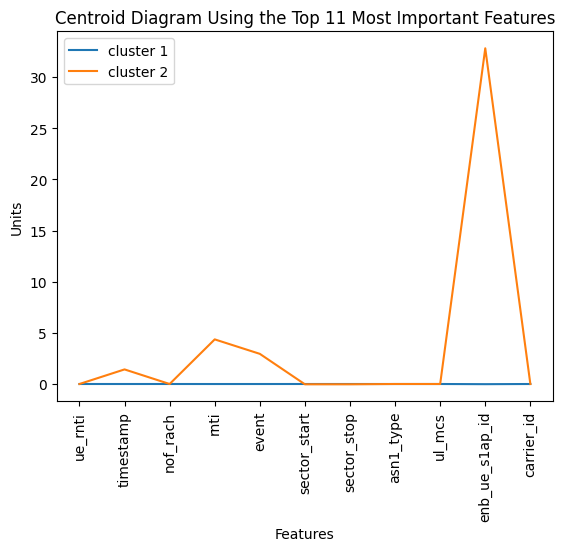

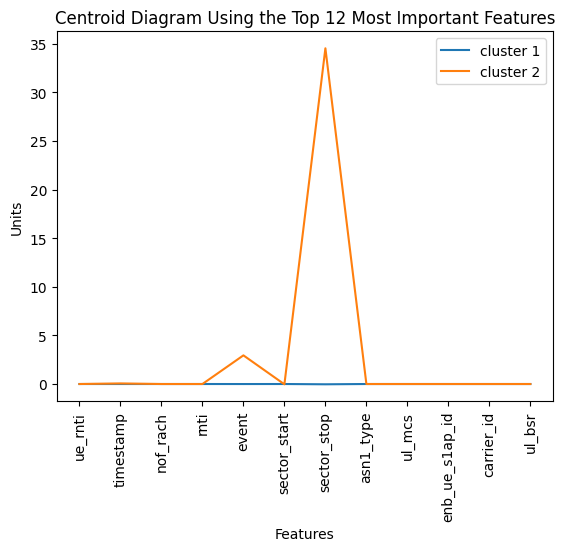

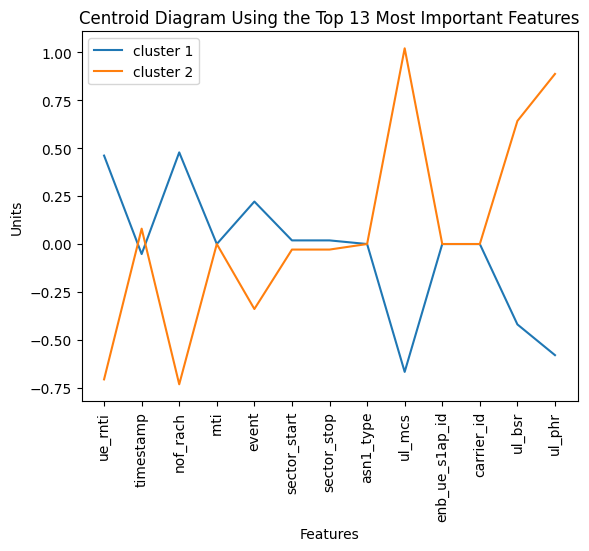

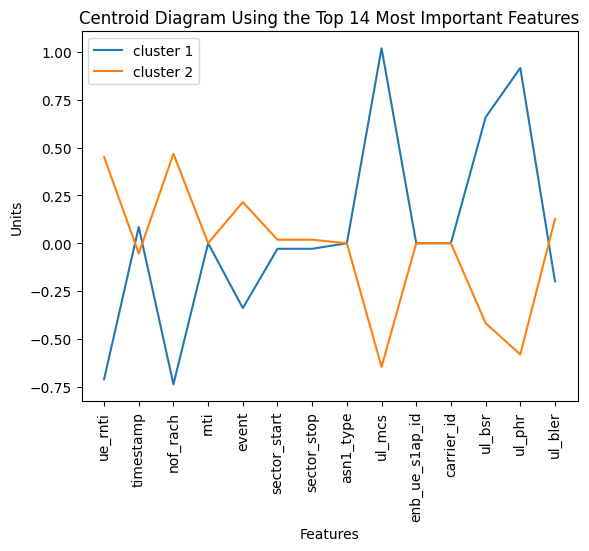

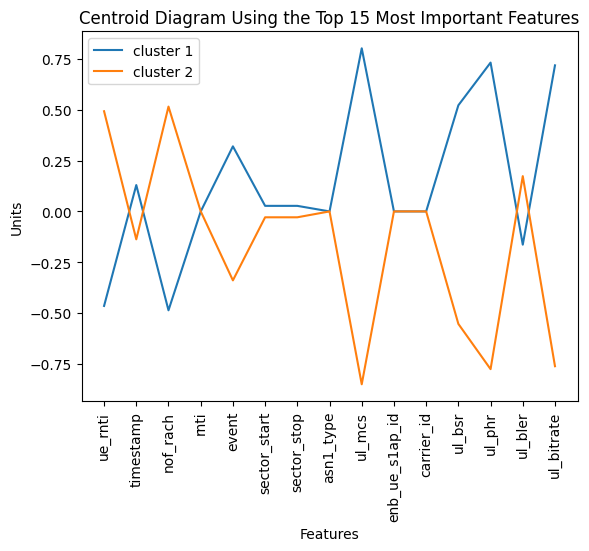

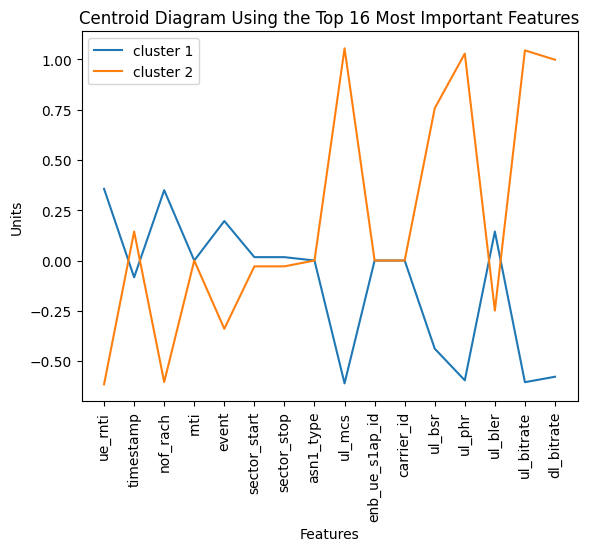

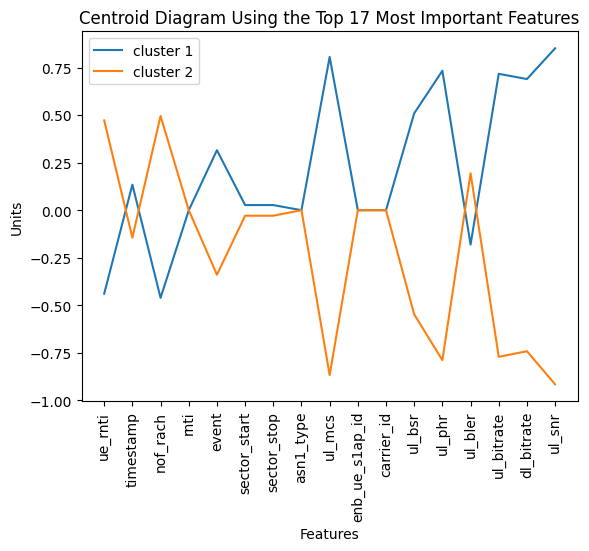

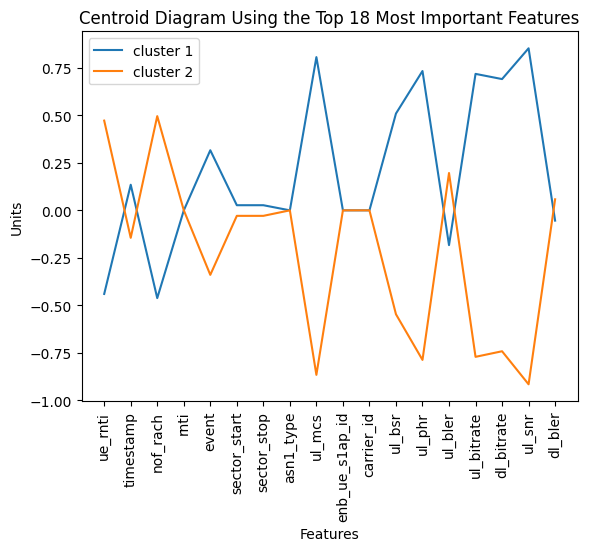

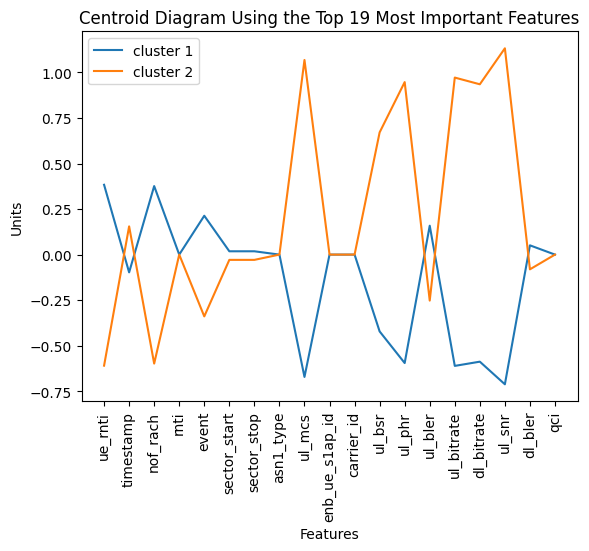

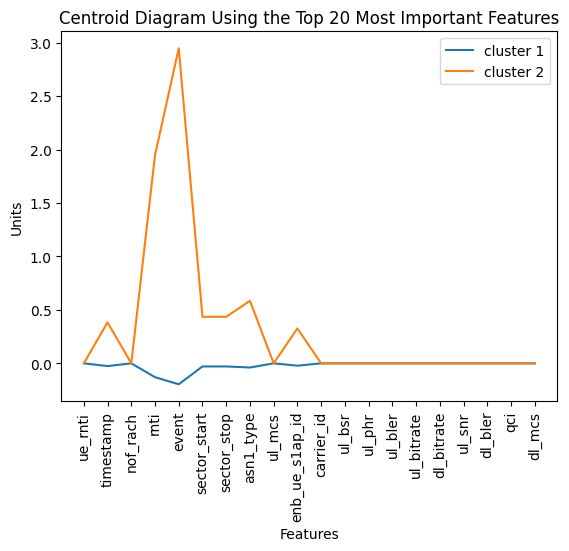

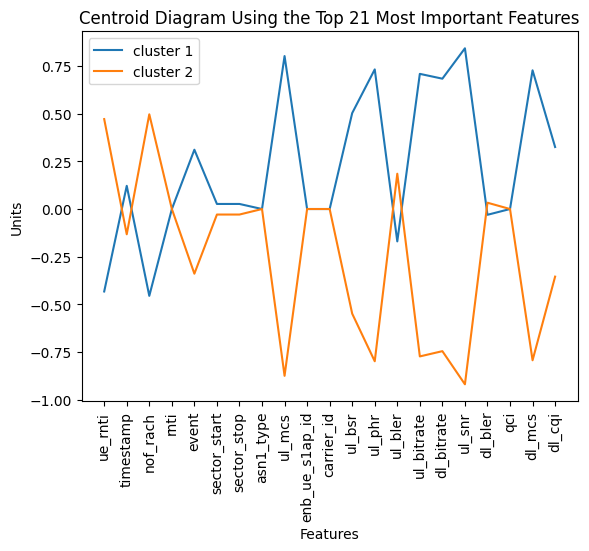

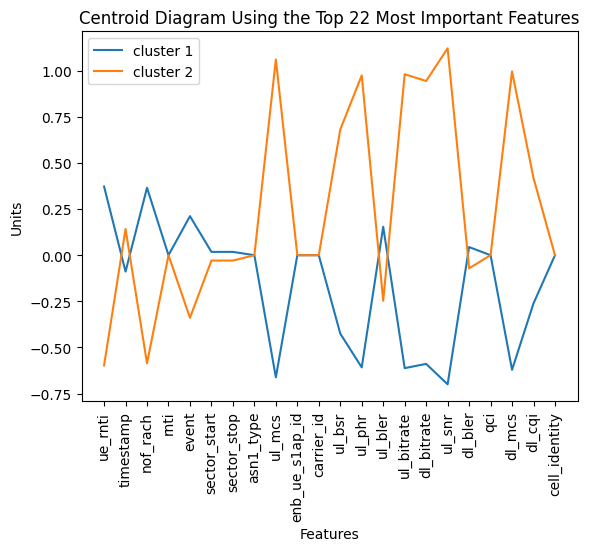

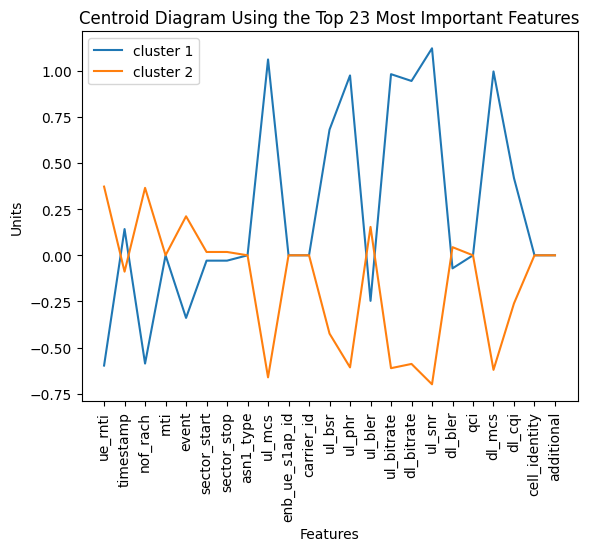

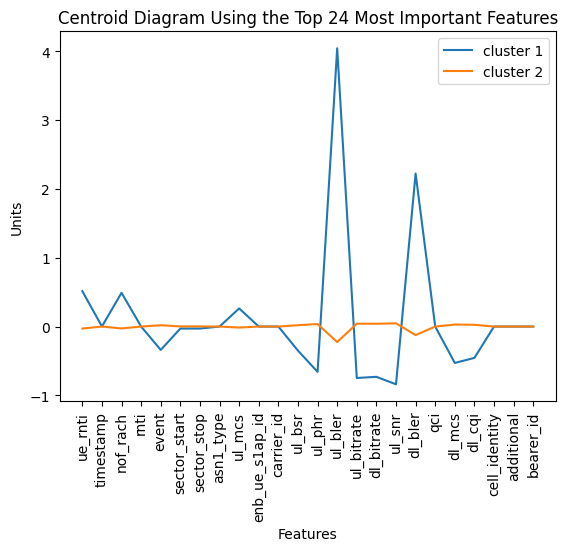

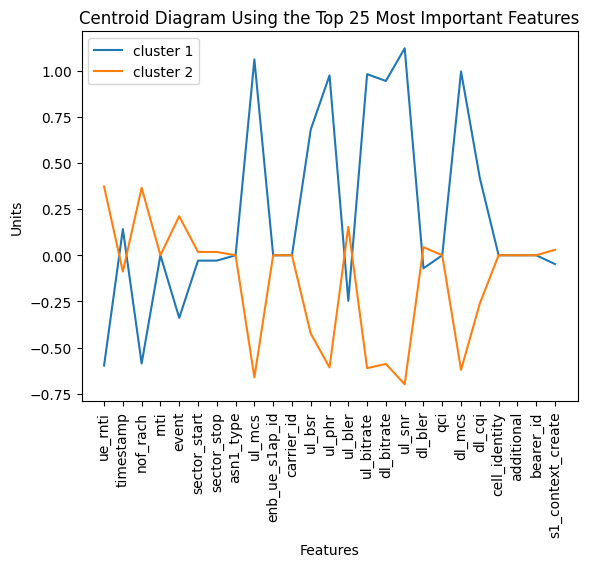

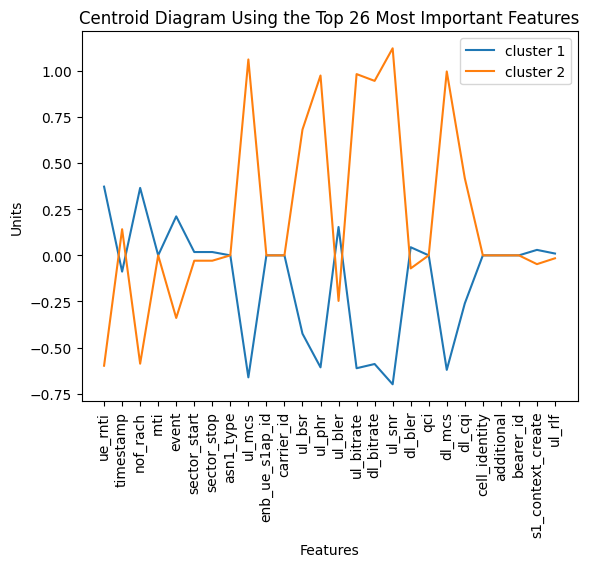

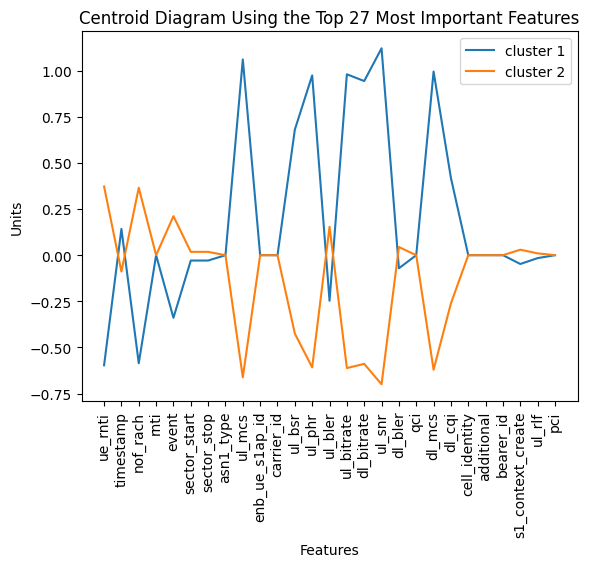

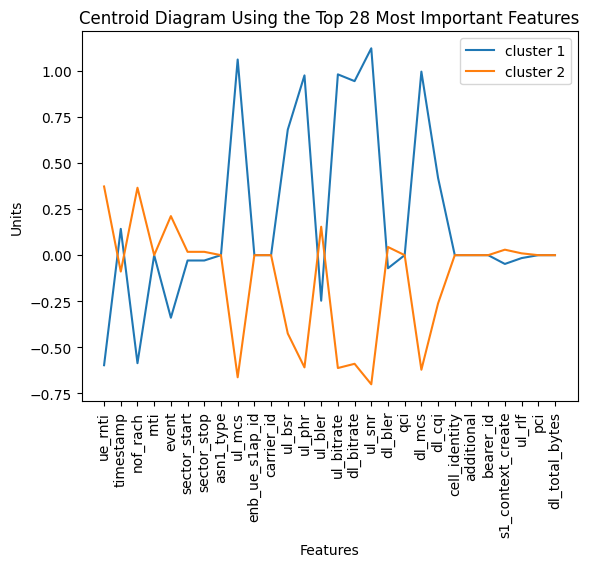

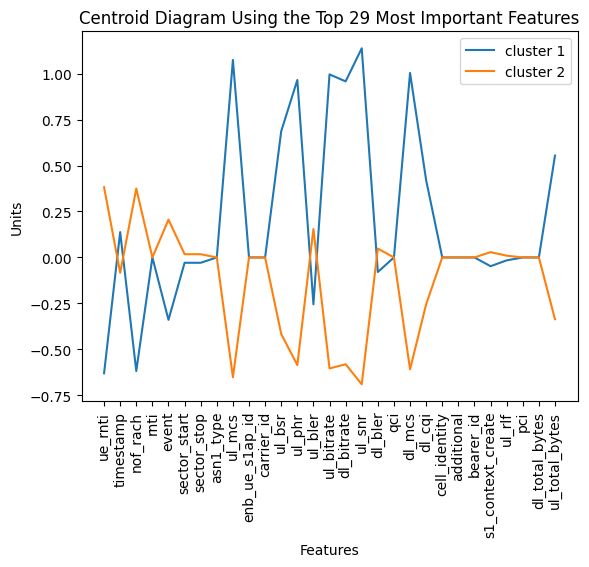

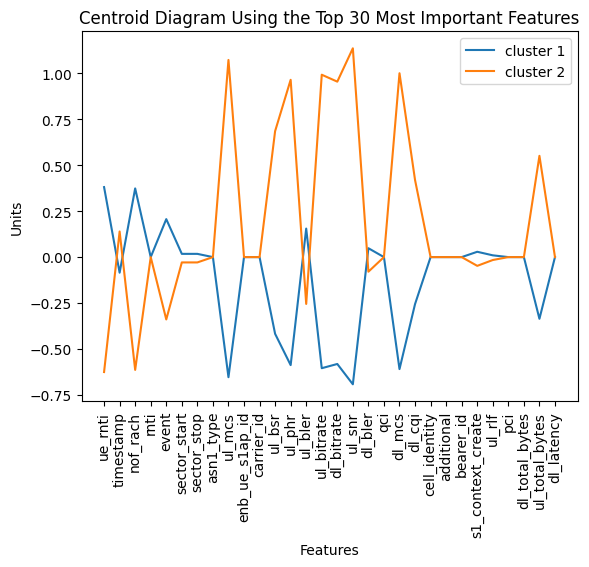

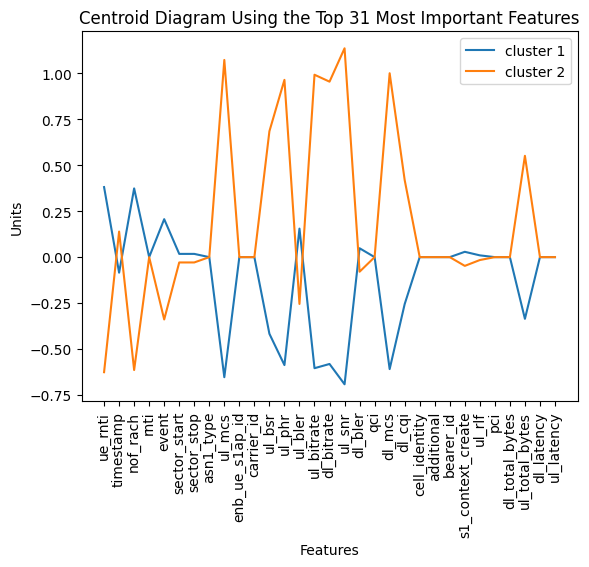

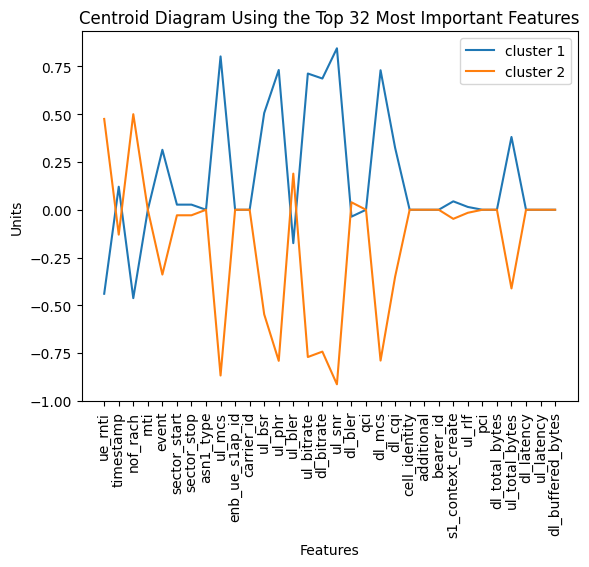

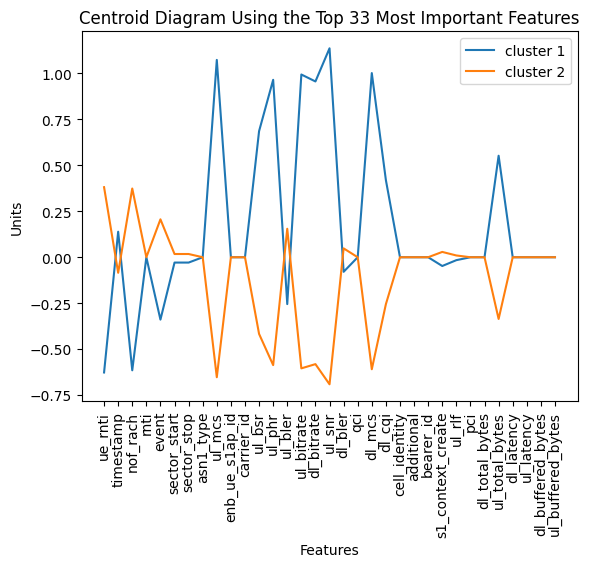

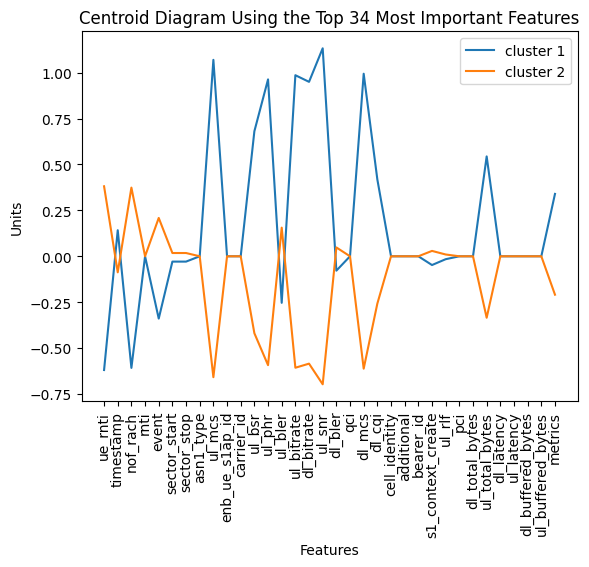

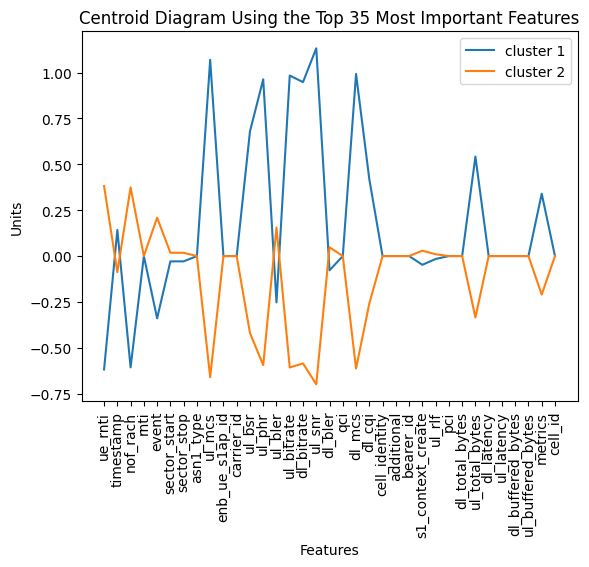

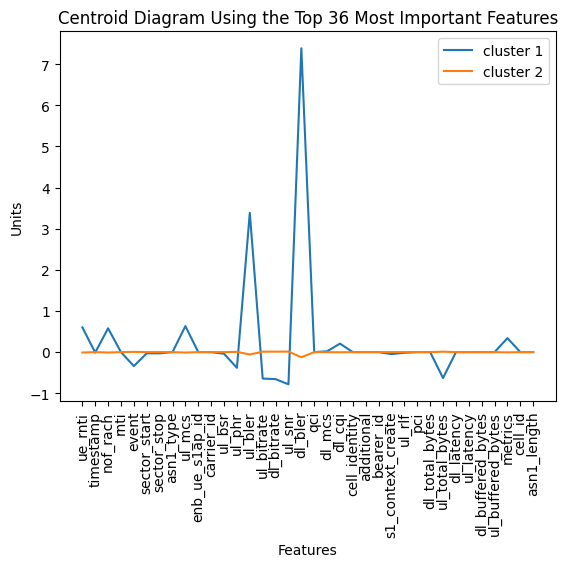

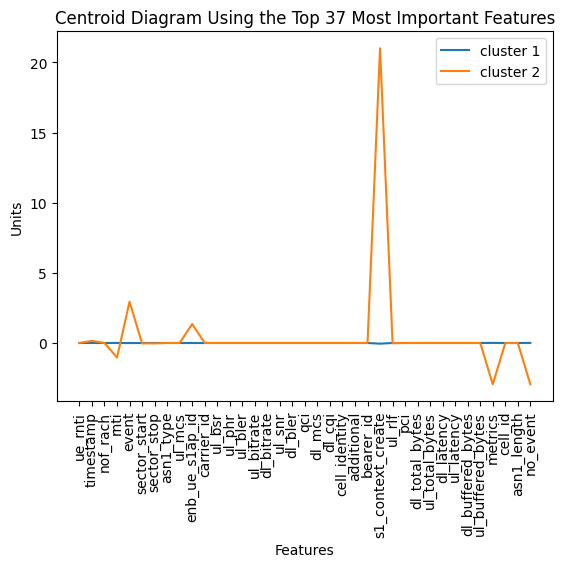

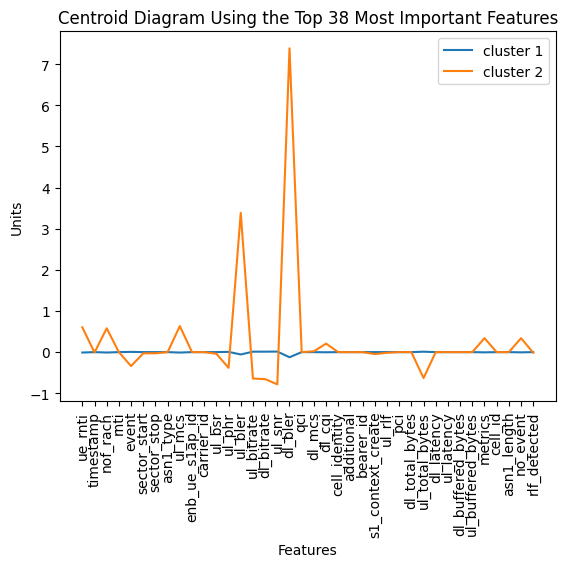

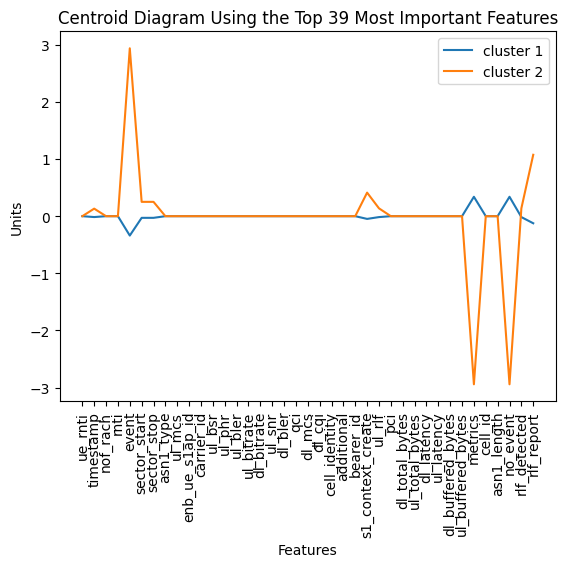

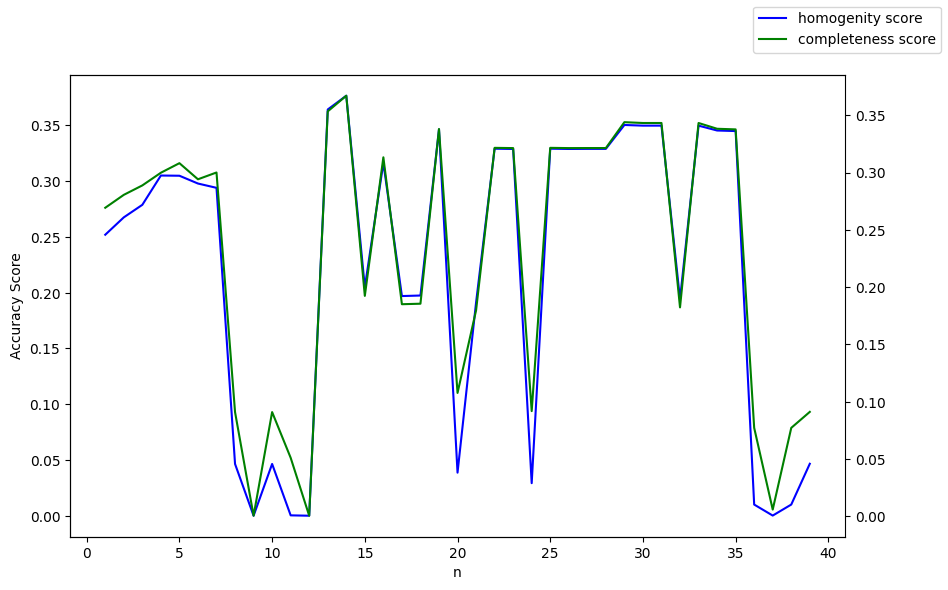

In [217]:
# call cluster method with different n values

n_values = range(1, 40)
homogenity_scores = []
completeness_scores = []

for n in n_values:
    homogenity, completeness = cluster(n)
    homogenity_scores.append(homogenity)
    completeness_scores.append(completeness)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(n_values, homogenity_scores, color = 'b', label = 'homogenity score')
ax1.set_xlabel('n')
ax1.set_ylabel('Accuracy Score')

ax2 = ax1.twinx()
ax2.plot(n_values, completeness_scores, color = 'g', label = 'completeness score')
ax2.spines['right'].set_visible(False)
fig.legend()
fig.show()
